[Α.Στοιχεία Ομάδας](#Στοιχεία) 

[Β.Εισαγωγή του Dataset](#Εισαγωγή)

[Γ.Baseline Classification](#Baseline)

[Δ.Βελτίωση Ταξινομητών](#Βελτίωση)

[Ε.Τελική Αρχιτεκτονική Μετασχηματισμών](#Final)

<a id='Στοιχεία'></a>

## Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

    >  Γκαμουλάκος Παρασκευάς:
    >  Καρυπιάδης Ευστράτιος: 03114911
    >  Μήτρο Νικόλαος:

In [1]:
import warnings
warnings.filterwarnings('ignore')

---

<a id='Εισαγωγή'></a>

## Εισαγωγή του Dataset

Το dataset μας προκύπτει έπειτα απο την εφαρμογή του συστήματος _HIPS (Hierarchical Image Processing System)_ σε σειρά εικονών, οι οποίες ελήφθησαν για τεσσερις διαφορετικές κατηγορίες οχημάτων κάτω από τις ίδιες συνθήκες φωτισμού και γωνίας λήψης. Τα χαρακτηριστικά που εξήχθησαν αντιστοιχούν σε μετρικές ψηφιακής περιγραφής των εικόνων και αποτελούν τις στήλες των δεδομένων μας. Εκμεταλλευόμενοι τα παραπάνω χαρακτηριστικά θα επιχειρήσουμε να ταξινομήσουμε τα δείγματα που έχουμε στην διάθεσή μας στην αντίστοιχη κατηγορία οχήματος που ανήκουν.

Τα αρχεία δεδομένων μας είναι χωρισμένα σε εννέα διαφορετικά αρχεία τα οποία θα ομαδοποιήσουμε σε έναν πίνακα. Αυτό επιτυγχάνεται με το σειριακό διάβασμα των αρχείων και την τελική ενοποίηση όλων των δεδομένων σε ένα Dataframe. Δεν υπάρχει αρίθμηση για κάθε διαφορετικό δείγμα-γραμμή, αλλά ούτε ονομασία για τα χαρακτηριστικά-στήλες μας. Για αυτό το λόγο επιλέγουμε να ονοματίσουμε της στήλες των δεδομένων μας, συμβουλεύομενοι την περιγραφή του dataset.

In [2]:
import glob
import pandas as pd

path = 'data'
all_data = glob.glob(path + '/*.dat')

l = []

column_names = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio',
                'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 
                'max.length_rectangularity', 'major.axis_scaled_variance', 'minor.axis_scaled_variance',
                'gyration_scaled_radius', 'major.axis skewness', 'minor.axis_skewness', 'minor.axis_kurtosis',
                'major.axis_curtosis', 'hollows_ratio', 'label']

for filename in all_data:
    df = pd.read_csv(filename, header=None, sep=' ', names = column_names, usecols= [num for num in range(19)])
    l.append(df)
    
cars = pd.concat(l, axis=0, ignore_index=True)
cars.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio,label
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας:

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                   846 non-null int64
circularity                   846 non-null int64
distance_circularity          846 non-null int64
radius_ratio                  846 non-null int64
pr.axis_aspect_ratio          846 non-null int64
max.length_aspect_ratio       846 non-null int64
scatter_ratio                 846 non-null int64
elongatedness                 846 non-null int64
pr.axis_rectangularity        846 non-null int64
max.length_rectangularity     846 non-null int64
major.axis_scaled_variance    846 non-null int64
minor.axis_scaled_variance    846 non-null int64
gyration_scaled_radius        846 non-null int64
major.axis skewness           846 non-null int64
minor.axis_skewness           846 non-null int64
minor.axis_kurtosis           846 non-null int64
major.axis_curtosis           846 non-null int64
hollows_ratio                 846 non-null int64
label        

In [4]:
cars.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
cars.shape

(846, 19)

Παρατηρούμε ότι έχουμε στη διάθεσή μας 846 δείγματα, καθένα από τα οποία συνοδεύεται από 18 συνολικά χαρακτηριστικά. Κατά συνέπεια ο πίνακας των δεδομένων μας αποτελείται από 19 στήλες, δεδομένου ότι η τελευταία αντιστοιχεί στις ετικέτες των κατηγοριών. Τα χαρακτηριστικά αυτά είναι σε μορφή αριθμών, ενώ δεν υπάρχει στήλη στην οποία να απουσιάζουν τιμές. Σημειώνουμε ότι η στήλη των ετικετών περιέχει τιμές σε μορφή κειμένου, τις οποίες όμως δε χρειάζεται να κωδικοποιήσουμε σε αριθμούς, εφόσον είναι διαφορετικές μεταξύ τους.

In [6]:
cars['label'].value_counts(normalize=True) * 100

bus     25.768322
saab    25.650118
opel    25.059102
van     23.522459
Name: label, dtype: float64

Οι κατηγορίες των οχημάτων μας είναι 4 και φέρουν τα ονόματα: _Bus, Van, Opel_ και _Saab_. Έχουμε ισορροπία στο σύνολο των δεδομένων, αφού όπως υπολογίζουμε κάθε κατηγορία συναστά περίπου το 1/4 του Dataset.

---

## Διαχωρισμός Δεδομένων Εκπαίδευσης & Ελέγχου

Αν και οι κατηγορίες μας είναι ισορροπημένες στο σύνολο των δεδομένων μας, για το διαχωρισμό αυτών θα χρησιμοποιήσουμε τη _StratifiedShuffleSplit_ ώστε να εξασφαλίσουμε ότι τα δεδομένα εκπαίδευσης θα αποτελούνται από αντιπροσωπευτικό πλήθος κατηγοριών με το ολικό Dataset:

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(cars, cars['label']):
    train_set = cars.reindex(train_index)
    test_set = cars.reindex(test_index)
    
train_set['label'].value_counts() / len(train_set) * 100

bus     25.739645
saab    25.591716
opel    25.147929
van     23.520710
Name: label, dtype: float64

<font color='red'> Σημειώνουμε ότι χρησιμοποιήσαμε την παράμετρο *random_state* για το διαχωρισμό των δεδομένων μας προκειμένου να μην αλλάζουμε συνεχώς κομμάτια αναφοράς του Notebook, όπου επικαλούμαστε αριθμητικά δεδομένα των μοντέλων μας. </font>

Τέλος, θα διαχωρίσουμε τα χαρακτηριστικά των δεδομένων μας από την κατηγορία στην οποία ανήκουν:

In [8]:
# Training Set
cars_train = train_set.drop('label', axis=1)
cars_train_labels = train_set['label'].copy()

# Test Set
cars_test = test_set.drop('label', axis=1)
cars_test_labels = test_set['label'].copy()

---

<a id='Baseline'></a>

## Baseline Classification

#### DummyClassifier

Αρχικά θα εκπαιδεύσουμε έναν _DummyClassifier_ χωρίς να μεταβάλλουμε τις παραμέτρους αρχικοποίησής του:

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(cars_train, cars_train_labels) # fitting on train_set

cars_predictions = dc_default.predict(cars_test) # predicting on test_set

target_names = dc_default.classes_.tolist() # fetch class names

dummy_default = accuracy_score(cars_test_labels, cars_predictions) * 100

In [10]:
dummy_default

21.764705882352942

Παρατηρούμε ότι η ακρίβεια του _DummyClassifier_ είναι αρκετά χαμηλή, με ποσοστό περίπου 21%.

Συνεχίζοντας, θα πάρουμε περισσότερες πληροφόριες για τη διαδικασία ταξινόμησης, υπολογίζοντας _Confusion Table_ καθώς και τις τιμές _Precision, Recall_ και _F1-Score_ :

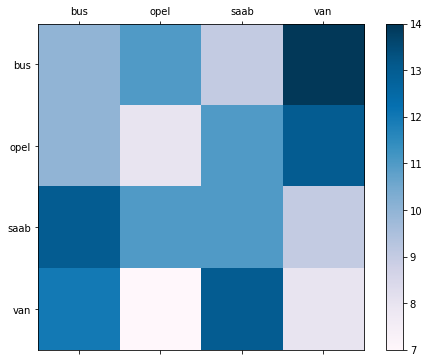

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(cars_test_labels, cars_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

dc_f1_micro = f1_score(cars_test_labels, cars_predictions, average='micro')
dc_f1_macro = f1_score(cars_test_labels, cars_predictions, average='macro')

print("F1-Micro Average: " + str(dc_f1_micro))
print("F1-Macro Average: " + str(dc_f1_macro) + "\n")

print(classification_report(cars_test_labels, cars_predictions))

F1-Micro Average: 0.2176470588235294
F1-Macro Average: 0.21693173429235155

              precision    recall  f1-score   support

         bus       0.22      0.23      0.22        44
        opel       0.22      0.19      0.20        42
        saab       0.25      0.25      0.25        44
         van       0.18      0.20      0.19        40

    accuracy                           0.22       170
   macro avg       0.22      0.22      0.22       170
weighted avg       0.22      0.22      0.22       170



Μελετώντας τον πίνακα σύγχυσης διασταυρώνουμε το ποσοστό επιτυχίας που σημειώσαμε παραπάνω, παρατηρώντας πως η κύρια διαγώνιος 
δεν παρουσιάζει εμφανώς έντονες τιμές. Σχετικά με τα _F1-Macro_ και _F1-Micro_ αναμένουμε να έχουν σχεδόν ίδιες τιμές, επειδή το πλήθος των δεδομένων μας ήταν ισορροπημένο ως προς τις κατηγορίες οχημάτων και κατά συνέπεια δε δημιουργείται κάποια κλίση ως προς την περισσότερη ή λιγότερη συχνή κατήγορια. Σε αυτό συμβάλλει επίπροσθέτως και το γεγονός ότι η ακρίβεια και η ανάκλιση της εκάστοτε κατηγορίας έχουν παραπλήσιες τιμές.

Σχετικά με τις τιμές ακρίβειας και ανάκλισης, παρατηρούμε ότι η κατηγορία *Saab* εμφανίζει τις υψηλότερες τιμές. Πιο συγκεκριμένα, εάν το σύστημα μας προβλέψει πως κάποιο δείγμα είναι αυτοκίνητο της συγκεκριμένης κατηγορίας είναι σωστό με ποσοστό 25%, ενώ από τις συνολικές φωτογραφίες του δεδομένου αυτοκινήτου, μπορεί να αναγνωρίσει μόλις το 1/4 αυτών. 

Τα παραπάνω αποτελέσματα δεν συνάδουν με τη διαισθητική, αρχική μας πρόβλεψη, καθώς αναμέναμε τις κατηγορίες _Bus_ και _Van_ να εμφανίζουν τις υψηλότερες αποδόσεις. Αυτό οφείλεται στο γεγονός ότι οι δύο αυτές κατηγορίες οχημάτων είναι οι περισσότερο προφανής προς ταξινόμηση, λόγω των χαρακτηριστικών διαφορών που παρουσιάζουν στο μέγεθος και στο σχήμα τους, σε σύγκριση με τα παραδοσιακά αμάξια των υπολοίπων δύο κατηγοριών. Αποδίδουμε αυτό το αποτέλεσμα στην τυχαιότητα προβλέψεων του _DummyClassifier_ και αναμένουμε να διασταυρώσουμε την εκτίμηση μας με επόμενους ταξινομητές.

#### KNeighborsClassifier

Θα συνεχίσουμε με την εκπαίδευση ενός προεπιλεγμένου _KNeighborsClassifier_ :

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(cars_train, cars_train_labels) # fitting on train_set

cars_predictions = knn.predict(cars_test) # predicting on test_set

target_names = knn.classes_.tolist() # fetch class names

knn_default = accuracy_score(cars_test_labels, cars_predictions) * 100

In [15]:
knn_default

67.05882352941175

Η ακρίβεια σε αυτήν την περίπτωση είναι αισθητά υψηλότερη από προηγουμένως. Ας εξετάσουμε τις ανάλογες μετρικές απόδοσης:

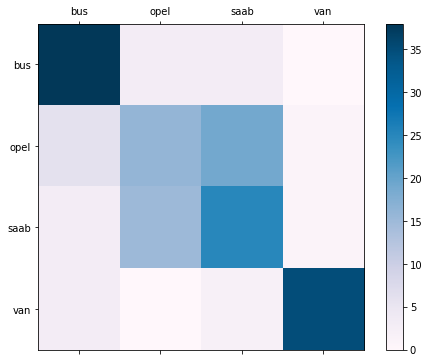

In [16]:
matrix = confusion_matrix(cars_test_labels, cars_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [18]:
kn_f1_micro = f1_score(cars_test_labels, cars_predictions, average='micro')
kn_f1_macro = f1_score(cars_test_labels, cars_predictions, average='macro')

print("F1-Micro Average: " + str(kn_f1_micro))
print("F1-Macro Average: " + str(kn_f1_macro) + "\n")

print(classification_report(cars_test_labels, cars_predictions))

F1-Micro Average: 0.6705882352941176
F1-Macro Average: 0.6690721468924699

              precision    recall  f1-score   support

         bus       0.76      0.86      0.81        44
        opel       0.47      0.38      0.42        42
        saab       0.51      0.57      0.54        44
         van       0.95      0.88      0.91        40

    accuracy                           0.67       170
   macro avg       0.67      0.67      0.67       170
weighted avg       0.67      0.67      0.67       170



Ο πίνακας σύγχυσης για το δεδομένο ταξινομητή παρατηρούμε ότι είναι περισσότερο διαγωνιοποιημένος, με υψηλά ποσοστά ακρίβειας για τις κατηγορίες _Bus_ και _Van_ , όπως αναμέναμε. Ανάλογη αύξηση σημειώνουμε και στις τιμές του *F1-score*, με παραπλήσιες τιμές για *Macro* και *Micro Average*. Οι λόγοι που οδηγούν σε αυτήν την οριακά ταύτιση των *F1-Micro* και *F1-Macro* αναλύθηκαν παραπάνω.

Τέλος σημειώνουμε ότι αν και ο ταξινομητής παρουσιάζει βελτιωμένη απόδοση με προηγουμένως, αντιμετωπίζει δυσκολία στο διαχωρισμό των δύο παραδοσιακών αυτοκινήτων _Opel_ και _Saab_ , αφού παρατηρώντας την ανάκλιση των συγκεκριμένων κατηγοριών, διαπιστώνουμε ότι μπορεί να αναγνωρίσει μονάχα το 38% και 57% αυτών, αντίστοιχα. Όπως αναμέναμε η ταξινόμηση των λεωφορείων και των φορτηγών χαρακτηρίζεται από υψηλότερα ποσοστά ακριβείας, γεγονός που αποτυπώνεται και στον πίνακα σύγχυσης.

Ολοκληρώντας την πρώτη μελέτη των δεδομένων μας με τους _Dummy_ και _KNeighbors_ ταξινομητές μας, παρουσιάζουμε παρακάτω ένα διάγραμμα συγκρίνοντας τις τιμές των βαθμολογιών *F1* ξεχωριστά για κάθε ταξινομητή:

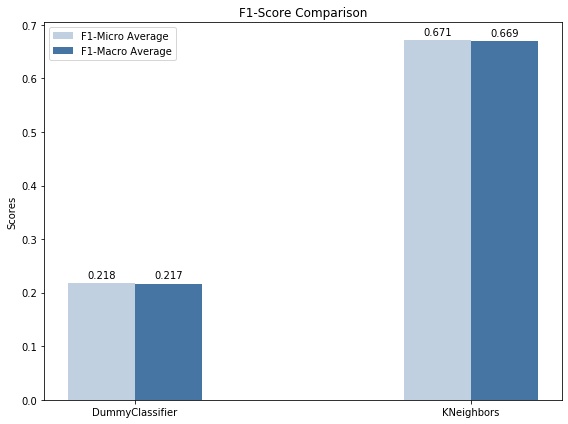

In [19]:
# Grouped BarPlot source: https://bit.ly/36y14Sw

labels = ['DummyClassifier', 'KNeighbors']
f1_micro = [round(dc_f1_micro, 3), round(kn_f1_micro, 3)]
f1_macro = [round(dc_f1_macro, 3), round(kn_f1_macro, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))
rect1 = ax.bar(x-width/2, f1_micro, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()

---

<a id='Βελτίωση'></a>

## Βελτίωση Ταξινομητών

Το σχήμα που θα ακολουθήσουμε για τη βελτιστιποίηση των ταξινομητών θα είναι:

                Επιλογή Χαρακτηριστικών - Κανονικοποίηση - Εξαγωγή Χαρακτηριστικών - Ταξινομητής
Πιο συγκεκριμένα θα προσθέτουμε σταδιακά κάθε ένα επίπεδο και θα ελέγχουμε τις αποδόσεις των μοντέλων για κάθε ένα από αυτά. Στη συνέχεια ακολουθεί ένας πίνακας περιεχομένων που παρουσιάζει τις τεχνικές που ακολουθήσαμε μαζί με την αντίστοιχη απόδοση των ταξινομητών μας. Με πράσινο χρώμα σημειώνεται η αρχιτεκτονική εκείνη που είχε τα καλύτερα αποτελέσματα για τoυς ταξινομητές που εξετάσαμε και η οποία ακολουθείται στο επόμενο μέρος του Notebook, για να εκτιμηθεί στο σύνολο ελέγχου των δεδομένων μας.

[1.Standardization](#Standardization) 

[2.Univariate Selection - Standardization](#Univariate_SelectionStandardization)

[3.Univariate Selection - Standardization - PCA](#Univariate_SelectionStandardizationPCA)

[4.Univariate Selection - Standardization - ICA](#Univariate_SelectionStandardizationICA)

[5.Recursive Feature Elimination - Standardization](#RFEStandardization)

[6.Recursive Feature Elimination - Standardization - PCA](#RFEStandardizationPCA)

[<font color='green'> 7.Recursive Feature Elimination - Standardization - ICA </font>](#RFEStandardizationICA)

Σημειώνουμε ότι κατά αυτό το στάδιο θα ασχοληθούμε αποκλειστικά με τα δεδομένα εκπαίδευσής μας. Προς αξιολόγηση των μοντέλων, λοιπόν, που πρόκειται να εξετάσουμε θα ακολουθήσουμε το σχήμα της *Cross_Validation*.

Προτού ξεκινήσουμε τη διαδικασία βελτιστοποίησης, θα υλοποιήσουμε μία δική μας συνάρτηση *Cross_Validation*, η οποία θα διαχωρίζει τα δεδομένα σε k μέρη και θα επιστρέφει σειριακά (k-1) ως train_set και (1) ως test_set. Σημειώνουμε ότι τα ορίσματα θα πρέπει να βρίσκονται σε μορφή NumPyArray, δεδομένου ότι θα έχουν περάσει ήδη από διαδικασία κανονικοποίησης. Θα χρησιμοποιήσουμε σχήμα διαχωρισμού δεδομένων 10-fold.

Τους ταξινομήτες μας θα τους εξετάσουμε με μία σειρά διαφορετικών ορισμάτων. Πιο συγκεκριμένα, στον *DummyClassifier* θα δοκιμάσουμε όλες τις δυνατές στρατηγικές εκπαίδευσης, ενώ στον *KNeighborsClassifier* θα δοκιμάσουμε τιμές γειτόνων στο διάστημα [1,30]. Για λόγους εξοικονόμησης χρόνου εκπαίδευσης και υπολογιστικής ισχύς, επιλέγουμε τους περιττούς όρους του διαστήματος.

In [20]:
def KFold_Dataframe(dataset, datalabels, i, k):
    """ Splits dataset and respective datalabels to k-folds, returns train and validation sets. """
    n = len(dataset)
    test = dataset[n*(i-1)//k:n*i//k]
    test_labels = datalabels[n*(i-1)//k:n*i//k]
    train = pd.concat([dataset[:n*(i-1)//k], dataset[n*i//k:]])
    train_labels = pd.concat([datalabels[:n*(i-1)//k], datalabels[n*i//k:]])
    
    return train, train_labels, test, test_labels

def KFold_NumpyArray(dataset, datalabels, i, k):
    """ Splits dataset and respective datalabels to k-folds, returns train and validation sets. """
    n = len(dataset)
    test = dataset[n*(i-1)//k:n*i//k]
    test_labels = datalabels[n*(i-1)//k:n*i//k]
    train = np.concatenate((dataset[:n*(i-1)//k], dataset[n*i//k:]), axis=0)
    train_labels = np.concatenate((datalabels[:n*(i-1)//k], datalabels[n*i//k:]), axis=0)
    
    return train, train_labels, test, test_labels

def Cross_Validation(cars_train_scaled, cars_train_labels, k):
    """ Yields dataset folds for cross validation. """
    for i in range(1, k+1):
        train, train_labels, test, test_labels = KFold_NumpyArray(cars_train_scaled, cars_train_labels.values, i, k)
        
        yield train, train_labels, test, test_labels
        
def KFold(dataset, k):
    """ Yields train and test indexes for a given dataset. """
    n = len(dataset)
    for i in range(1, k+1):
        curr_train_index = [num for num in list(range(0, n*(i-1)//k)) + list(range(n*i//k, n))]
        train_index = np.asarray(curr_train_index)
        curr_test_index = [num for num in range(n*(i-1)//k, n*i//k)]
        test_index = np.asarray(curr_test_index)
        
        yield train_index, test_index

Τέλος, θα χρονομετρήσουμε τη διαδικασία εκπαίδευσης και αξιολόγησης των επόμενων σταδίων. Ο χρόνος εκπαίδευσης στα δεδομένα ελέγχου μας μέσω *Cross_Validation* θα απεικονίζεται στο τέλος κάθε σταδίου.

In [21]:
import time

<a id='Standardization'></a>

### 1. Standardization

Σαν πρώτο βήμα προεπεξεργασίας θα δοκιμάσουμε μόνο την κανονικοποίηση των δεδομένων μας. Επιλέγουμε τον *StandardScaler*, προκειμένου το μοντέλο μας να είναι περισσότερο ανεκτικό σε outlier τιμές.

In [22]:
features = [i for i in range(1, 18)] # features to select for SelectKBest
neighbors = [i+1 for i in range(30)] # range of neighbors to examine for KNeighborsClassifier
strategies = ['stratified', 'most_frequent', 'prior', 'uniform'] # available strategies for DummyClassifier

#### DummyClassifier - Scaled

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cars_train_scaled = std_scaler.fit_transform(cars_train) # fitting/transforming on train set
cars_test_scaled = std_scaler.transform(cars_test) # transforming on test set

In [24]:
start_time = time.time()

result_dummy_scaled = {}

for st in strategies:
    acc = []
    dc = DummyClassifier(strategy=st)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_scaled, cars_train_labels, 10):
        dc.fit(train, train_labels)
        pred = dc.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result_dummy_scaled[(sum(acc)/len(acc))] = st
    
dummy_scaled = max(result_dummy_scaled)

final_time = (time.time() - start_time)/60

In [25]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dummy_scaled[dummy_scaled]) + " strategy: " + str(dummy_scaled))

Training Time: 0.0004 minutes

Default: 21.764705882352942
Scaled with uniform strategy: 25.460930640913084


#### KNeighborsClassifier - Scaled

In [26]:
start_time = time.time()

result_knn_scaled = {}

for el in neighbors:
    acc = []
    knn = KNeighborsClassifier(n_neighbors=el)
    for train, train_labels, test, test_labels in Cross_Validation(cars_train_scaled, cars_train_labels, 10):
        knn.fit(train, train_labels)
        pred = knn.predict(test)
        acc.append(accuracy_score(test_labels, pred) * 100)
    result_knn_scaled[sum(acc)/len(acc)] = el

knn_scaled = max(result_knn_scaled)

final_time = (time.time() - start_time)/60

In [27]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn_scaled[knn_scaled])+ " neighbors: " + str(knn_scaled))

Training Time: 0.0245 minutes

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236


Παρατηρούμε ότι η κανονικοποίηση επηρέασε θετικά την απόδοση των ταξινομητών μας. Θα την συμπεριλάβουμε λοιπόν στην αρχιτεκτονική μετασχηματισμού των δεδομένων μας, προσθέτωντας πριν από αυτή τεχνικές επιλογής χαρακτηριστικών.

<a id='Univariate_SelectionStandardization'></a>

### 2. Univariate Selection, Standardization

Ως τεχνική επιλογής χαρακτηριστικών επιλέγουμε τη συνάρτηση *SelectKBest*, η οποία με τη βοήθεια της *mutual_info_classif* θα επιλέξει εκείνα τα χαρακτηριστικά που έχουν τη μεγαλύτερη εξάρτηση με την κατηγορία των δειγμάτων μας. Προφανώς μετά την επιλογή, κανονικοποιούμε τα δεδομένα μας και έπειτα τα εκπαιδεύουμε στους ταξινομητές μας.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#### DummyClassifier - UniSelected, Scaled

In [29]:
start_time = time.time()

dummy_uni_scaled = 0

for feat in features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > dummy_uni_scaled:
            dummy_uni_scaled = sum(acc)/len(acc)
            dummy_uni_scaled_feat = feat
            dummy_uni_scaled_strat = st
            
final_time = (time.time() - start_time)/60

In [30]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dummy_scaled[dummy_scaled]) + " strategy: " + str(dummy_scaled))
print("UniSelected_Scaled with " + str(dummy_uni_scaled_strat) + " strategy and " + str(dummy_uni_scaled_feat) + " features: " + str(dummy_uni_scaled))

Training Time: 0.043 minutes

Default: 21.764705882352942
Scaled with uniform strategy: 25.460930640913084
UniSelected_Scaled with stratified strategy and 2 features: 28.107989464442493


#### KNeighborsClassifier - UniSelected, Scaled

In [31]:
start_time = time.time()

knn_uni_scaled = 0

for feat in features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > knn_uni_scaled:
            knn_uni_scaled = sum(acc)/len(acc)
            knn_uni_scaled_feat = feat
            knn_uni_scaled_neigh = el

final_time = (time.time() - start_time)/60

In [32]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn_scaled[knn_scaled])+ " neighbors: " + str(knn_scaled))
print("UniSelected_Scaled with " + str(knn_uni_scaled_neigh)+ " neighbors and " + str(knn_uni_scaled_feat) + " features: " + str(knn_uni_scaled))

Training Time: 0.3854 minutes

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236
UniSelected_Scaled with 3 neighbors and 12 features: 73.38235294117648


Η απόδοση των ταξινομητών μας βελτιώθηκε με την επιλογή χαρακτηριστικών που εφαρμόσαμε. Σαν τελικό στάδιο θα προσθέσουμε τη διαδικασία εξαγωγής χαρακτηριστικών.

<a id='Univariate_SelectionStandardizationPCA'></a>

### 3. Univariate Selection, Standardization, PCA

Συνεχίζουμε την παραπάνω διαδικασία με τη μείωση της διαστατικότητας των δεδομένων μας. Αρχικά θα δοκιμάσουμε την *Principal Component Analysis (PCA)*, με όρισμα τον πραγματικό αριθμό 0.95 που αντιστοιχεί στο ελάχιστο ποσοστό διακύμανσης που θα πρέπει να διατηρούν τα χαρακτηριστικά μας, ούτως ώστε να μην αφαιρεθούν από το σύνολο.

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

#### DummyClassifier - UniSelected, Scaled, PCA

In [34]:
start_time = time.time()

dummy_uni_scaled_pca = 0

for feat in features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > dummy_uni_scaled_pca:
            dummy_uni_scaled_pca = sum(acc)/len(acc)
            dummy_uni_scaled_pca_feat = feat
            dummy_uni_scaled_pca_strat = st
    
final_time = (time.time() - start_time)/60

In [35]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dummy_scaled[dummy_scaled]) + " strategy: " + str(dummy_scaled))
print("UniSelected_Scaled with " + str(dummy_uni_scaled_strat) + " strategy and " + str(dummy_uni_scaled_feat) + " features: " + str(dummy_uni_scaled))
print("UniSelected_Scaled_PCA with " + str(dummy_uni_scaled_pca_strat) + " strategy and " + str(dummy_uni_scaled_pca_feat) + " features: " + str(dummy_uni_scaled_pca))

Training Time: 0.048 minutes

Default: 21.764705882352942
Scaled with uniform strategy: 25.460930640913084
UniSelected_Scaled with stratified strategy and 2 features: 28.107989464442493
UniSelected_Scaled_PCA with uniform strategy and 9 features: 28.402107111501323


#### KNeighborsClassifier - UniSelected, Scaled, PCA

In [36]:
start_time = time.time()

knn_uni_scaled_pca = 0

for feat in features:
    fs = SelectKBest(score_func=mutual_info_classif, k=feat)
    cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > knn_uni_scaled_pca:
            knn_uni_scaled_pca = sum(acc)/len(acc)
            knn_uni_scaled_pca_feat = feat
            knn_uni_scaled_pca_neigh = el

final_time = (time.time() - start_time)/60

In [37]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn_scaled[knn_scaled])+ " neighbors: " + str(knn_scaled))
print("UniSelected_Scaled with " + str(knn_uni_scaled_neigh)+ " neighbors and " + str(knn_uni_scaled_feat) + " features: " + str(knn_uni_scaled))
print("UniSelected_Scaled_PCA with " + str(knn_uni_scaled_pca_neigh)+ " neighbors and " + str(knn_uni_scaled_pca_feat) + " features: " + str(knn_uni_scaled_pca))

Training Time: 0.3507 minutes

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236
UniSelected_Scaled with 3 neighbors and 12 features: 73.38235294117648
UniSelected_Scaled_PCA with 3 neighbors and 16 features: 67.01273046532046


Η τεχνική _PCA_ δε βελτίωσε περαιτέρω την απόδοση των ταξινομητών μας και για αυτό δοκιμάζουμε στη συνέχεια την τεχνική *ICA*.

<a id='Univariate_SelectionStandardizationICA'></a>

### 4. Univariate Selection, Standardization, ICA

Θα εφαρμόσουμε την *Independent Component Analysis (ICA)*, με σκοπό να διαχωρίσουμε τα δεδομένα μας σε ανεξάρτητα δομικά στοιχεία και να κρατήσουμε τα περισσότερο σημαντικά από αυτά. Για να εξερευνήσουμε ποιός είναι ο αριθμός των χρήσιμων χαρακτηριστικών, θα εξετάσουμε προφανώς το διάστημα [1,18] εκπαιδεύοντας τους ταξινομητές σε κάθε αριθμό του διαστήματος αυτού και για κάθε διαφορετική στρατηγική και πλήθος γειτόνων για τους *DummyClassifier* και *KNeighborsClassifier*, αντίστοιχα. Παράλληλα θα δοκιμάζουμε και όλους τους πιθανούς συνδυασμούς χρήσιμων χαρακτηριστικών μέσω της *SelectKBest*.

In [38]:
from sklearn.decomposition import FastICA

#### DummyClassifier - UniSelected, Scaled, ICA

In [39]:
start_time = time.time()

dummy_uni_scaled_ica = 0

for comp in features:
    ica = FastICA(n_components=comp)
    for feat in features:
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
        cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_ica = ica.fit_transform(cars_train_selected_scaled)
        for st in strategies:
            acc = []
            dc = DummyClassifier(strategy=st)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                dc.fit(train, train_labels)
                pred = dc.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > dummy_uni_scaled_ica:
                dummy_uni_scaled_ica = sum(acc)/len(acc)
                dummy_uni_scaled_ica_feat = feat
                dummy_uni_scaled_ica_strat = st
                dummy_uni_scaled_ica_comps = comp
                
final_time = (time.time() - start_time)/60

In [40]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("Scaled with " + str(result_dummy_scaled[dummy_scaled]) + " strategy: " + str(dummy_scaled))
print("UniSelected_Scaled with " + str(dummy_uni_scaled_strat) + " strategy and " + str(dummy_uni_scaled_feat) + " features: " + str(dummy_uni_scaled))
print("UniSelected_Scaled_PCA with " + str(dummy_uni_scaled_pca_strat) + " strategy and " + str(dummy_uni_scaled_pca_feat) + " features: " + str(dummy_uni_scaled_pca))
print("UniSelected_Scaled_ICA with " + str(dummy_uni_scaled_ica_strat) + " strategy, " + str(dummy_uni_scaled_ica_feat) + " features and " + str(dummy_uni_scaled_ica_comps) + " components: "+ str(dummy_uni_scaled_ica))

Training Time: 0.9723 minutes

Default: 21.764705882352942
Scaled with uniform strategy: 25.460930640913084
UniSelected_Scaled with stratified strategy and 2 features: 28.107989464442493
UniSelected_Scaled_PCA with uniform strategy and 9 features: 28.402107111501323
UniSelected_Scaled_ICA with uniform strategy, 1 features and 2 components: 30.32045654082528


#### KNeighborsClassifier - UniSelected, Scaled, ICA

In [41]:
start_time = time.time()

knn_uni_scaled_ica = 0

for comp in features:
    ica = FastICA(n_components=comp)
    for feat in features:
        fs = SelectKBest(score_func=mutual_info_classif, k=feat)
        cars_train_selected = fs.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_ica = ica.fit_transform(cars_train_selected_scaled)
        for el in neighbors:
            acc = []
            knn = KNeighborsClassifier(n_neighbors=el)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                knn.fit(train, train_labels)
                pred = knn.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > knn_uni_scaled_ica:
                knn_uni_scaled_ica = sum(acc)/len(acc)
                knn_uni_scaled_ica_feat = feat
                knn_uni_scaled_ica_neigh = el
                knn_uni_scaled_ica_comps = comp
                
final_time = (time.time() - start_time)/60

In [42]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("Scaled with " + str(result_knn_scaled[knn_scaled])+ " neighbors: " + str(knn_scaled))
print("UniSelected_Scaled with " + str(knn_uni_scaled_neigh)+ " neighbors and " + str(knn_uni_scaled_feat) + " features: " + str(knn_uni_scaled))
print("UniSelected_Scaled_PCA with " + str(knn_uni_scaled_pca_neigh)+ " neighbors and " + str(knn_uni_scaled_pca_feat) + " features: " + str(knn_uni_scaled_pca))
print("UniSelected_Scaled_ICA with " + str(knn_uni_scaled_ica_neigh)+ " neighbors, " + str(knn_uni_scaled_ica_feat) + " features and " + str(knn_uni_scaled_ica_comps) + " componetns: " + str(knn_uni_scaled_ica))

Training Time: 6.7798 minutes

Default: 67.05882352941175
Scaled with 3 neighbors: 70.26777875329236
UniSelected_Scaled with 3 neighbors and 12 features: 73.38235294117648
UniSelected_Scaled_PCA with 3 neighbors and 16 features: 67.01273046532046
UniSelected_Scaled_ICA with 3 neighbors, 17 features and 17 componetns: 80.18217734855136


Με την παραπάνω αρχιτεκτονική πετύχαμε βελτίωση από 21.17% σε 30.34% για τον *DummyClassifier* και από 67.05% σε 80.63% για τον *KNeighborsClassifier*. Συνολικά, πρόκειται για ένα μοντέλο με προοπτικές, προτού όμως καταλήξουμε σε αυτό θα δοκιμάσουμε ακόμα μία σειρά μετασχηματισμών.

<a id='RFEStandardization'></a>

### 5. Recursive Feature Elimination, Standardization

Σε αυτή τη προσέγγισή μας θα ακολουθήσουμε την τεχνική της σταδιακής αφαίρεσης χαρακτηριστικών (*Recursive Feature Elimination*) ελέγχοντας την απόδοση των ταξινομητών μας σε κάθε κατάσταση από εκείνες που προκύπτουν. Για να χρησιμοποιήσουμε την αντίστοιχη συνάρτηση του *SkLearn*, θα χρειαστούμε τη *LogisticRegression* ως εκτιμητή, εκμεταλλευόμενοι τους συντελεστές των χαρακτηριστικών που προκύπτουν απο τη διαδικασία.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### DummyClassifier - RFE, Scaled

In [44]:
start_time = time.time()

dummy_rfe_scaled = 0

for feat in features:
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
    cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > dummy_rfe_scaled:
            dummy_rfe_scaled = sum(acc)/len(acc)
            dummy_rfe_scaled_strat = st
            dummy_rfe_scaled_feat = feat
            
final_time = (time.time() - start_time)/60

In [45]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("RFESelected_Scaled with " + str(dummy_rfe_scaled_strat) + " strategy and " + str(dummy_rfe_scaled_feat) + " features: " + str(dummy_rfe_scaled))

Training Time: 0.0476 minutes

Default: 21.764705882352942
RFESelected_Scaled with uniform strategy and 9 features: 28.255048287971903


#### KNeighborsClassifier - RFE, Scaled

In [46]:
start_time = time.time()

knn_rfe_scaled = 0

for feat in features:
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
    cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > knn_rfe_scaled:
            knn_rfe_scaled = sum(acc)/len(acc)
            knn_rfe_scaled_neigh = el
            knn_rfe_scaled_feat = feat
            
final_time = (time.time() - start_time)/60

In [47]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("RFESelected_Scaled with " + str(knn_rfe_scaled_neigh)+ " neighbors and " + str(knn_rfe_scaled_feat) + " features: " + str(knn_rfe_scaled))

Training Time: 0.388 minutes

Default: 67.05882352941175
RFESelected_Scaled with 9 neighbors and 11 features: 73.22212467076383


Παρατηρούμε ότι η παραπάνω διαδικασία βελτιώνει και πάλι τις αποδόσεις των ταξινομητών μας. Θα προχωρήσουμε το μοντέλο μας, προσθέτοντας τεχνικές εξαγωγής χαρακτηριστικών.

<a id='RFEStandardizationPCA'></a>

### 6. Recursive Feature Elimination, Standardization, PCA

Όπως και προηγουμένως, θα ξεκινήσουμε με *Principal Components Analysis (PCA)*:

#### DummyClassifier - RFE, Scaled, PCA

In [48]:
start_time = time.time()

dummy_rfe_scaled_pca = 0

for feat in features:
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
    cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for st in strategies:
        acc = []
        dc = DummyClassifier(strategy=st)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            dc.fit(train, train_labels)
            pred = dc.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > dummy_rfe_scaled_pca:
            dummy_rfe_scaled_pca = sum(acc)/len(acc)
            dummy_rfe_scaled_pca_strat = st
            dummy_rfe_scaled_pca_feat = feat

final_time = (time.time() - start_time)/60

In [49]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("RFESelected_Scaled with " + str(dummy_rfe_scaled_strat) + " strategy and " + str(dummy_rfe_scaled_feat) + " features: " + str(dummy_rfe_scaled))
print("RFESelected_Scaled_PCA with " + str(dummy_rfe_scaled_pca_strat) + " strategy and " + str(dummy_rfe_scaled_pca_feat) + " features: " + str(dummy_rfe_scaled_pca))

Training Time: 0.0535 minutes

Default: 21.764705882352942
RFESelected_Scaled with uniform strategy and 9 features: 28.255048287971903
RFESelected_Scaled_PCA with stratified strategy and 2 features: 28.112379280070236


#### KNeighborsClassifier - RFE, Scaled, PCA

In [50]:
start_time = time.time()

knn_rfe_scaled_pca = 0

for feat in features:
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
    cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
    cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
    cars_train_selected_scaled_pca = pca.fit_transform(cars_train_selected_scaled)
    for el in neighbors:
        acc = []
        knn = KNeighborsClassifier(n_neighbors=el)
        for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_pca, cars_train_labels, 10):
            knn.fit(train, train_labels)
            pred = knn.predict(test)
            acc.append(accuracy_score(test_labels, pred) * 100)
        if sum(acc)/len(acc) > knn_rfe_scaled_pca:
            knn_rfe_scaled_pca = sum(acc)/len(acc)
            knn_rfe_scaled_pca_neigh = el
            knn_rfe_scaled_pca_feat = feat

final_time = (time.time() - start_time)/60

In [51]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("RFESelected_Scaled with " + str(knn_rfe_scaled_neigh)+ " neighbors and " + str(knn_rfe_scaled_feat) + " features: " + str(knn_rfe_scaled))
print("RFESelected_Scaled_PCA with " + str(knn_rfe_scaled_pca_neigh)+ " neighbors, " + str(knn_rfe_scaled_pca_feat) + " features: " + str(knn_rfe_scaled_pca))

Training Time: 0.3633 minutes

Default: 67.05882352941175
RFESelected_Scaled with 9 neighbors and 11 features: 73.22212467076383
RFESelected_Scaled_PCA with 11 neighbors, 11 features: 69.94951712028094


Παρατηρούμε ότι η *PCA* δεν συνέβαλε στη βελτίωση της απόδοσης των ταξινομητών μας, όπως παρατηρήσαμε και στην προηγούμενη αρχιτεκτονική που ακολουθήσαμε.

<a id='RFEStandardizationICA'></a>

### 7. Recursive Feature Elimination, Standardization, ICA

Έναντι της *PCA*, προσθέτουμε στην αρχιτεκτονική μετασχηματισμού των δεδομένων μας την τεχνική *ICA*:

#### DummyClassifier - RFE, Scaled, ICA

In [52]:
start_time = time.time()

dummy_rfe_scaled_ica = 0

for comp in features:
    ica = FastICA(n_components=comp)
    for feat in features:
        rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
        cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_ica = ica.fit_transform(cars_train_selected_scaled)
        for st in strategies:
            acc = []
            dc = DummyClassifier(strategy=st)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                dc.fit(train, train_labels)
                pred = dc.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > dummy_rfe_scaled_ica:
                dummy_rfe_scaled_ica = sum(acc)/len(acc)
                dummy_rfe_scaled_ica_strat = st
                dummy_rfe_scaled_ica_feat = feat
                dummy_rfe_scaled_ica_comps = comp

final_time = (time.time() - start_time)/60

In [53]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(dummy_default))
print("RFESelected_Scaled with " + str(dummy_rfe_scaled_strat) + " strategy and " + str(dummy_rfe_scaled_feat) + " features: " + str(dummy_rfe_scaled))
print("RFESelected_Scaled_PCA with " + str(dummy_rfe_scaled_pca_strat) + " strategy and " + str(dummy_rfe_scaled_pca_feat) + " features: " + str(dummy_rfe_scaled_pca))
print("RFESelected_Scaled_ICA with " + str(dummy_rfe_scaled_ica_strat) + " strategy, " + str(dummy_rfe_scaled_ica_feat) + " features and " + str(dummy_rfe_scaled_ica_comps) + " components: " + str(dummy_rfe_scaled_ica))

Training Time: 1.048 minutes

Default: 21.764705882352942
RFESelected_Scaled with uniform strategy and 9 features: 28.255048287971903
RFESelected_Scaled_PCA with stratified strategy and 2 features: 28.112379280070236
RFESelected_Scaled_ICA with uniform strategy, 8 features and 4 components: 29.743195785776997


#### KNeighborsClassifier - RFE, Scaled, ICA

In [54]:
start_time = time.time()

knn_rfe_scaled_ica = 0

for comp in features:
    ica = FastICA(n_components=comp)
    for feat in features:
        rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=feat, step=1)
        cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels)
        cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
        cars_train_selected_scaled_ica = ica.fit_transform(cars_train_selected_scaled)
        for el in neighbors:
            acc = []
            knn = KNeighborsClassifier(n_neighbors=el)
            for train, train_labels, test, test_labels in Cross_Validation(cars_train_selected_scaled_ica, cars_train_labels, 10):
                knn.fit(train, train_labels)
                pred = knn.predict(test)
                acc.append(accuracy_score(test_labels, pred) * 100)
            if sum(acc)/len(acc) > knn_rfe_scaled_ica:
                knn_rfe_scaled_ica = sum(acc)/len(acc)
                knn_rfe_scaled_ica_neigh = el
                knn_rfe_scaled_ica_feat = feat
                knn_rfe_scaled_ica_comps = comp
                
final_time = (time.time() - start_time)/60

In [55]:
print("Training Time: " + str(round(final_time, 4)) + " minutes" + "\n")
print("Default: " + str(knn_default))
print("RFESelected_Scaled with " + str(knn_rfe_scaled_neigh)+ " neighbors and " + str(knn_rfe_scaled_feat) + " features: " + str(knn_rfe_scaled))
print("RFESelected_Scaled_PCA with " + str(knn_rfe_scaled_pca_neigh)+ " neighbors, " + str(knn_rfe_scaled_pca_feat) + " features: " + str(knn_rfe_scaled_pca))
print("RFESelected_Scaled_ICA with " + str(knn_rfe_scaled_ica_neigh)+ " neighbors, " + str(knn_rfe_scaled_ica_feat) + " features and " + str(knn_rfe_scaled_ica_comps) + " components: " + str(knn_rfe_scaled_ica))

Training Time: 6.8082 minutes

Default: 67.05882352941175
RFESelected_Scaled with 9 neighbors and 11 features: 73.22212467076383
RFESelected_Scaled_PCA with 11 neighbors, 11 features: 69.94951712028094
RFESelected_Scaled_ICA with 1 neighbors, 10 features and 9 components: 80.78797190517997


Όπως και προηγουμένως, η τεχνική *ICA* επιδρά θετικά στη βελτίωση της απόδοσης των ταξινομητών μας. Πιο συγκεκριμένα, βελτιώσαμε την ακρίβεια του *DummyClassifier* από 21% σε 29% και εκείνη του *KNeighborsClassifier* από 67% σε 80%. Οι τιμές αυτές είναι οριακά καλύτερες από το προηγούμενο σχήμα μετασχηματισμών που ακολουθήσαμε.

---

<a id='Final'></a>

## Τελική Αρχιτεκτονική Μετασχηματισμών

Συγκρίνοντας τα παραπάνω σχήματα αρχιτεκτονικών που δοκιμάσαμε στα δεδομένα εκπαίδευσής μας και δίνοντας μεγαλύτερο βάρος στον ταξινομητή του *KNeighbors*, καταλήγουμε ότι το αποδοτικότερο σχήμα είναι:

            Recursive Feature Elimination(RFE) - Standardization - Independent Component Analysis(ICA)
Πιο συγκεκριμένα, οι βέλτιστες τιμές για τους ταξινομητές και τους μετασχηματισμούς είναι οι ακόλουθες:

#### DummyClassifier

- 8 Features επιλογής για RFE μέσω LogisticRegression, 4 Components για ICA και στρατηγική Uniform για DummyClassifier

#### KNeighborsClassifier

- 10 Features επιλογής για RFE μέσω LogisticRegression, 9 Components για ICA και 1 γείτονας για KNeighborsClassifier

Σημειώνουμε ότι διάφορες παράμετροι των συναρτήσεων και τον αλγορίθμων που χρησιμοποιήθηκαν εξετάστηκαν μονάχα στα δεδομένα εκπαίδευσης, ώστε να αποφύγουμε το overfitting στο σύνολο των δειγμάτων μας. Επειδή οι υπερπαράμετροι έχουν βελτιστοποιηθεί στο σύνολο των δεδομένων εκπαίδευσης, αναμένουμε σίγουρα χαμηλότερη απόδοση στο σύνολο δεδομένων ελέγχου, η οποία ωστόσο θα είναι βελτιωμένη από την αρχική.

Στη συνέχεια πρόκειται να εφαρμόσουμε τους αντίστοιχους μετασχηματισμούς και στα δεδομένα ελέγχου και τελικά να εκτιμήσουμε την τελική απόδοση των μοντέλων μας:

In [56]:
# Recursive Feature Elimination
cars_train_selected = rfe_selector.fit_transform(cars_train, cars_train_labels) 
cars_test_selected = rfe_selector.transform(cars_test)

# Standardization
cars_train_selected_scaled = std_scaler.fit_transform(cars_train_selected)
cars_test_selected_scaled = std_scaler.transform(cars_test_selected)

# Independent Component Analysis
cars_train_prepared = ica.fit_transform(cars_train_selected_scaled)
cars_test_prepared = ica.transform(cars_test_selected_scaled)

#### DummyClassifier

In [57]:
ica = FastICA(n_components=4)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=8, step=1)

dc = DummyClassifier(strategy='uniform')

dc.fit(cars_train_prepared, cars_train_labels)
dummy_final_predictions = dc.predict(cars_test_prepared)
dummy_final = accuracy_score(cars_test_labels, dummy_final_predictions) * 100

In [58]:
print("Dummy_Default: " + str(dummy_default))
print("Dummy_Optimized: " + str(dummy_final))

Dummy_Default: 21.764705882352942
Dummy_Optimized: 27.058823529411764


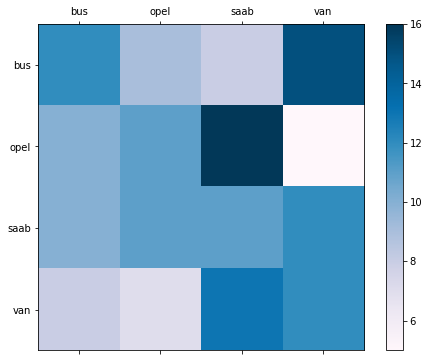

In [59]:
matrix = confusion_matrix(cars_test_labels, dummy_final_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [60]:
dc_f1_micro_final = f1_score(cars_test_labels, dummy_final_predictions, average='micro')
dc_f1_macro_final = f1_score(cars_test_labels, dummy_final_predictions, average='macro')

print("F1-Micro Average: " + str(dc_f1_micro_final))
print("F1-Macro Average: " + str(dc_f1_macro_final) + "\n")

print(classification_report(cars_test_labels, dummy_final_predictions))

F1-Micro Average: 0.27058823529411763
F1-Macro Average: 0.271389751552795

              precision    recall  f1-score   support

         bus       0.30      0.27      0.29        44
        opel       0.29      0.26      0.28        42
        saab       0.23      0.25      0.24        44
         van       0.27      0.30      0.29        40

    accuracy                           0.27       170
   macro avg       0.27      0.27      0.27       170
weighted avg       0.27      0.27      0.27       170



Παρατηρούμε ότι η βελτίωση στον *DummyClassifier* δεν είναι σημαντική, το οποίο αποδίδουμε στην τυχαιότητα που τον χαρακτηρίζει. Όπως έχουμε αναφέρει και παραπάνω η διαφορά μεταξύ *F1-Micro* και *F1-Macro* δεν είναι μεγάλη λόγω του ισορροπημένου συνόλου δεδομένων μας και της ομοιότητας μεταξύ ακρίβειας και ανάκλισης που χαρακτηρίζει τις κατηγορίες μας. Για τη συγκεκριμένη περίπτωση του ταξινομητή, η κατηγορία του λεωφορείου εμφανίζει την υψηλότερη ακρίβεια, καθώς είναι σωστός στις προβλέψεις του κατά 30% για τη δεδομένη κατηγορία. Επίσης η κατηγορία του φορτηγού εμφανίζει την υψηλότερη ανάκλιση, με το μοντέλο μας να είναι ικανό να αναγνωρίζει τα 3/10 των αντίστοιχων δειγμάτων. 

#### KNeighborsClassifier

In [61]:
ica = FastICA(n_components=9)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(cars_train_prepared, cars_train_labels)
knn_final_predictions = knn.predict(cars_test_prepared)
knn_final = accuracy_score(cars_test_labels, knn_final_predictions) * 100

In [62]:
print("KNeighbors_Default: " + str(knn_default))
print("KNeighbors_Optimized: " + str(knn_final))

KNeighbors_Default: 67.05882352941175
KNeighbors_Optimized: 77.05882352941177


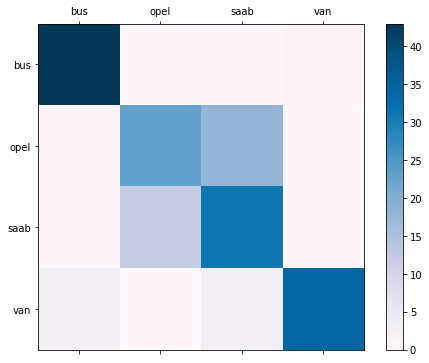

In [63]:
matrix = confusion_matrix(cars_test_labels, knn_final_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [64]:
kn_f1_micro_final = f1_score(cars_test_labels, knn_final_predictions, average='micro')
kn_f1_macro_final = f1_score(cars_test_labels, knn_final_predictions, average='macro')

print("F1-Micro Average: " + str(kn_f1_micro_final))
print("F1-Macro Average: " + str(kn_f1_macro_final) + "\n")

print(classification_report(cars_test_labels, knn_final_predictions))

F1-Micro Average: 0.7705882352941177
F1-Macro Average: 0.7711713015245625

              precision    recall  f1-score   support

         bus       0.90      0.98      0.93        44
        opel       0.66      0.55      0.60        42
        saab       0.60      0.70      0.65        44
         van       0.97      0.85      0.91        40

    accuracy                           0.77       170
   macro avg       0.78      0.77      0.77       170
weighted avg       0.78      0.77      0.77       170



Σχετικά με τον *KNeighborsClassifier*, η βελτίωση που πετύχαμε με την αρχιτεκτονική μετασχηματισμών μας είναι αξιοσημείωτη. Η συνολική ακρίβεια και ανάκλιση του μοντέλου μας ανέρχεται σε 78% και 77% αντίστοιχα, ενώ η τιμή *F1-score* είναι κοινή για *Micro* και *Macro* average. Παρατηρούμε ότι οι κατηγορίες του λεωφορείου και του φορτηγού έχουν τις υψηλότερες τιμές στον πίνακα σύγχυσης, γεγονός ανεμενόμενο, όπως αναφέραμε και στην αρχική αξιολόγηση των ταξινομητών μας. Η κατηγορία του φορτηγού έχει την υψηλότερη ακρίβεια, δηλαδή το μοντέλο μας είναι σωστό κατά 97% όταν εκτιμά πως ένα δείγμα ανήκει στην αντίστοιχη κατηγορία. Τέλος, η κατηγορία του λεωφορείου χαρακτηρίζεται από την υψηλότερη ανάκλιση, δεδομένου ότι το μοντέλο μας μπορεί να αναγνωρίσει σωστά το 98% των δειγμάτων που αντιστοιχούν σε λεωφορέια. Οι παραπάνω δύο παρατηρήσεις είναι εμφανείς και στον πίνακα σύγχυσης με πιο έντονη κατηγόρια, εκείνη του λεωφορείου.

Κλείνοντας, παρουσιάζουμε ένα διάγραμμα προς σύγκριση ταξινομητών μας, πριν και μετά τη διαδικασία βελτιστοποίησης που ακολουθήσαμε. Η βελτίωση που πετύχαμε και για τους δύο ταξινομητές μας ανέρχεται σε περίπου 10%.

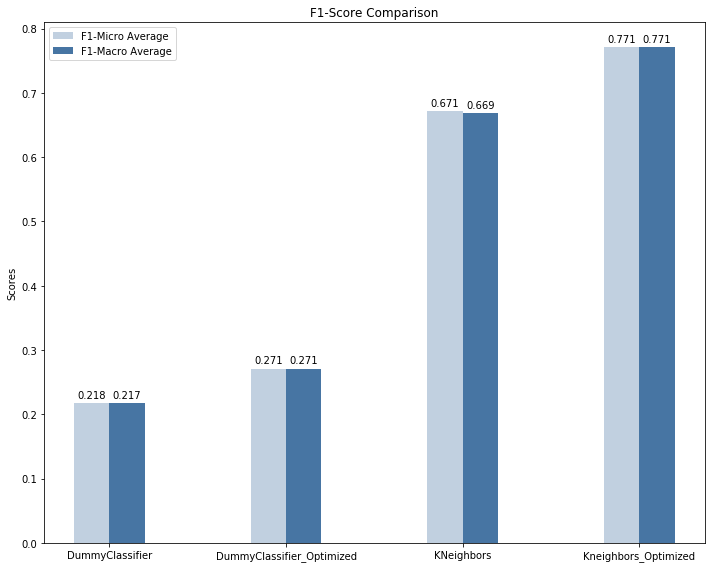

In [65]:
# Grouped BarPlot source: https://bit.ly/36y14Sw

labels = ['DummyClassifier', 'DummyClassifier_Optimized', 'KNeighbors', 'Kneighbors_Optimized']
f1_micro = [round(dc_f1_micro, 3), round(dc_f1_micro_final, 3), round(kn_f1_micro, 3), round(kn_f1_micro_final, 3)]
f1_macro = [round(dc_f1_macro, 3), round(dc_f1_macro_final, 3), round(kn_f1_macro, 3), round(kn_f1_macro_final, 3)]

width = 0.20
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 8))
rect1 = ax.bar(x-width/2, f1_micro, width, label='F1-Micro Average', color=(0.2, 0.4, 0.6, 0.3))
rect2 = ax.bar(x+width/2, f1_macro, width, label='F1-Macro Average', color=(0.2, 0.4, 0.6, 0.9))

ax.legend()
ax.set_xticks(x)
ax.set_ylabel('Scores')
ax.set_xticklabels(labels)
ax.set_title('F1-Score Comparison')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x()+rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
fig.tight_layout()

plt.show()